In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
loan_encoded = pd.read_csv('datasets/encoded_dataset.csv')
loan_encoded = loan_encoded.drop(['open_credit', 'age'], axis=1)
print("✅ Dropped 'open_credit' and 'age' because they contained no values.")


✅ Dropped 'open_credit' and 'age' because they contained no values.


In [24]:
num_cols = [
    'open_credit', 'rate_of_interest', 'Interest_rate_spread',
    'Upfront_charges', 'term', 'property_value', 'income',
    'Credit_Score', 'LTV', 'dtir1'
]

In [25]:
X = loan_encoded.drop('Status', axis=1)
y = loan_encoded['Status']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
X_train.to_csv('datasets/X_train.csv', index=False)
X_test.to_csv('datasets/X_test.csv', index=False)
y_train.to_csv('datasets/y_train.csv', index=False)
y_test.to_csv('datasets/y_test.csv', index=False)
print("✅ Train-test split files saved")

✅ Train-test split files saved


In [28]:
X_train.to_csv('datasets/X_train.csv', index=False)
X_test.to_csv('datasets/X_test.csv', index=False)
y_train.to_csv('datasets/y_train.csv', index=False)
y_test.to_csv('datasets/y_test.csv', index=False)
print("✅ Train-test split files saved")

✅ Train-test split files saved


In [29]:
X_train.to_csv('datasets/X_train_scaled.csv', index=False)
X_test.to_csv('datasets/X_test_scaled.csv', index=False)
print("✅ Scaled datasets saved as 'X_train_scaled.csv' and 'X_test_scaled.csv'")


✅ Scaled datasets saved as 'X_train_scaled.csv' and 'X_test_scaled.csv'


In [30]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}


In [31]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"✅ {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print('-' * 50)


C:\Users\pavan\.conda\envs\project1\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Logistic Regression Accuracy: 0.7536
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22406
           1       1.00      0.00      0.00      7328

    accuracy                           0.75     29734
   macro avg       0.88      0.50      0.43     29734
weighted avg       0.81      0.75      0.65     29734

--------------------------------------------------
✅ Random Forest Accuracy: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

--------------------------------------------------


C:\Users\pavan\.conda\envs\project1\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:31:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Accuracy: 0.9998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

--------------------------------------------------
✅ K-Nearest Neighbors Accuracy: 0.8717
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     22406
           1       0.76      0.71      0.73      7328

    accuracy                           0.87     29734
   macro avg       0.83      0.82      0.82     29734
weighted avg       0.87      0.87      0.87     29734

--------------------------------------------------
✅ Decision Tree Accuracy: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00   

In [32]:
import pandas as pd
import numpy as np

# ✅ 1. Basic shape check
print("🔹 Dataset shape:", loan_encoded.shape)

# Replace 'target' below with your actual target column name if different
target_col = 'Status'  # <-- change this if your target column has a different name

if target_col in loan_encoded.columns:
    print("✅ Target column found:", target_col)
else:
    print("❌ Target column not found! Please specify it correctly.")
    raise SystemExit

# ✅ 2. Check if target accidentally exists in X
X = loan_encoded.drop(target_col, axis=1)
y = loan_encoded[target_col]

if target_col in X.columns:
    print("🚨 DATA LEAK DETECTED: target column still inside feature set!")
else:
    print("✅ No data leakage (target properly removed).")

# ✅ 3. Check duplicates
duplicates = loan_encoded.duplicated().sum()
if duplicates > 0:
    print(f"⚠️ Found {duplicates} duplicate rows. You may want to drop them.")
else:
    print("✅ No duplicate rows found.")

# ✅ 4. Check for imbalance in target
class_counts = y.value_counts()
print("\n🔹 Target class distribution:")
print(class_counts)
imbalance_ratio = class_counts.min() / class_counts.max()

if imbalance_ratio < 0.5:
    print(f"⚠️ Dataset might be imbalanced (ratio = {imbalance_ratio:.2f}). Consider using SMOTE or class weights.")
else:
    print("✅ Target classes are balanced.")

# ✅ 5. Final sanity check
print("\nFinal sanity checks passed — safe to train models ✅")



🔹 Dataset shape: (148669, 23)
✅ Target column found: Status
✅ No data leakage (target properly removed).
⚠️ Found 12 duplicate rows. You may want to drop them.

🔹 Target class distribution:
Status
0    112031
1     36638
Name: count, dtype: int64
⚠️ Dataset might be imbalanced (ratio = 0.33). Consider using SMOTE or class weights.

Final sanity checks passed — safe to train models ✅


In [33]:
loan_encoded.columns


Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1', 'loan_type_type2', 'loan_type_type3',
       'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4',
       'Credit_Worthiness_l2', 'business_or_commercial_nob/c',
       'interest_only_not_int', 'lump_sum_payment_not_lpsm',
       'occupancy_type_pr', 'occupancy_type_sr', 'Security_Type_direct'],
      dtype='object')


Logistic Regression Accuracy: 0.7702
              precision    recall  f1-score   support

         0.0       0.77      0.99      0.87     22425
         1.0       0.81      0.09      0.15      7307

    accuracy                           0.77     29732
   macro avg       0.79      0.54      0.51     29732
weighted avg       0.78      0.77      0.69     29732


Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22425
         1.0       1.00      1.00      1.00      7307

    accuracy                           1.00     29732
   macro avg       1.00      1.00      1.00     29732
weighted avg       1.00      1.00      1.00     29732



C:\Users\pavan\.conda\envs\project1\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:32:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.9999
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22425
         1.0       1.00      1.00      1.00      7307

    accuracy                           1.00     29732
   macro avg       1.00      1.00      1.00     29732
weighted avg       1.00      1.00      1.00     29732


K-Nearest Neighbors Accuracy: 0.9546
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     22425
         1.0       0.87      0.96      0.91      7307

    accuracy                           0.95     29732
   macro avg       0.93      0.96      0.94     29732
weighted avg       0.96      0.95      0.96     29732


Decision Tree Accuracy: 0.9999
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22425
         1.0       1.00      1.00      1.00      7307

    accuracy                           1.00     29732
   macro avg       1.00      1.0

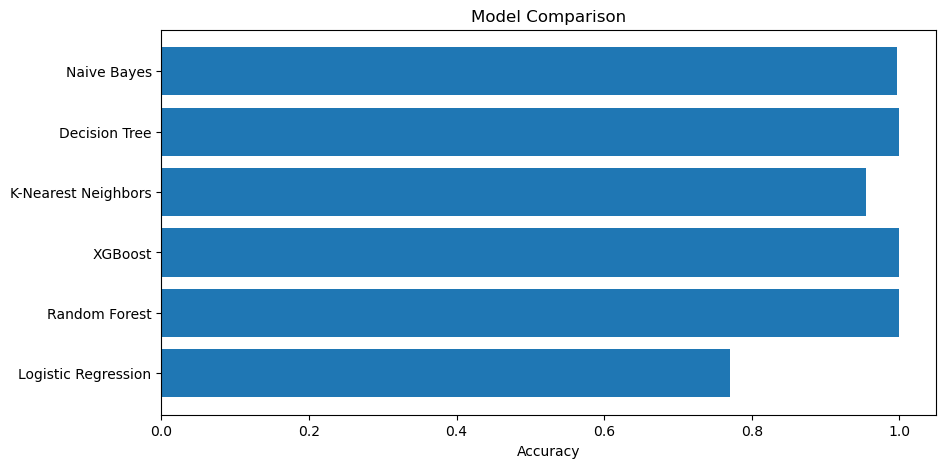


Best Model: Random Forest (Accuracy: 1.0000)


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

data_path = "infosys spring board internship/kaggle/input/dataset-loan_default/Loan_Default_Cleaned.csv"
df = pd.read_csv(data_path)

df = df.drop_duplicates()
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

X = df.drop('Status', axis=1)
y = df['Status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,5))
plt.barh(list(results.keys()), list(results.values()))
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.show()

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
joblib.dump(best_model, f"{best_model_name.replace(' ', '_')}.pkl")
print(f"\nBest Model: {best_model_name} (Accuracy: {results[best_model_name]:.4f})")


In [36]:
corr = df.corr(numeric_only=True)['Status'].sort_values(ascending=False)
print(corr.head(15))


Status                  1.0000
loan_type_type2         0.0924
dtir1                   0.0613
Credit_Worthiness_l2    0.0349
LTV                     0.0315
loan_purpose_p2         0.0294
occupancy_type_sr       0.0085
loan_purpose_p3         0.0070
Credit_Score            0.0041
loan_type_type3         0.0031
rate_of_interest        0.0020
Interest_rate_spread   -0.0000
term                   -0.0003
Upfront_charges        -0.0014
open_credit_opc        -0.0100
Name: Status, dtype: float64


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1)
y = df['Status']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(15))


rate_of_interest               0.3270
Interest_rate_spread           0.3268
Upfront_charges                0.2152
property_value                 0.0445
LTV                            0.0336
dtir1                          0.0223
lump_sum_payment_not_lpsm      0.0076
income                         0.0067
loan_amount                    0.0030
term                           0.0026
loan_type_type2                0.0025
business_or_commercial_nob/c   0.0023
loan_purpose_p4                0.0018
loan_type_type3                0.0014
loan_purpose_p3                0.0010
dtype: float64


In [38]:
leaky_cols = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges']
df = df.drop(columns=leaky_cols)



Logistic Regression Accuracy: 0.7681
              precision    recall  f1-score   support

         0.0       0.77      0.99      0.87     22425
         1.0       0.79      0.08      0.14      7307

    accuracy                           0.77     29732
   macro avg       0.78      0.53      0.50     29732
weighted avg       0.77      0.77      0.69     29732


Random Forest Accuracy: 0.8893
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93     22425
         1.0       0.91      0.61      0.73      7307

    accuracy                           0.89     29732
   macro avg       0.90      0.80      0.83     29732
weighted avg       0.89      0.89      0.88     29732



C:\Users\pavan\.conda\envs\project1\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:33:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.8916
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93     22425
         1.0       0.92      0.61      0.74      7307

    accuracy                           0.89     29732
   macro avg       0.90      0.80      0.83     29732
weighted avg       0.89      0.89      0.88     29732


K-Nearest Neighbors Accuracy: 0.8511
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     22425
         1.0       0.80      0.52      0.63      7307

    accuracy                           0.85     29732
   macro avg       0.83      0.74      0.77     29732
weighted avg       0.85      0.85      0.84     29732


Decision Tree Accuracy: 0.8157
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     22425
         1.0       0.62      0.66      0.64      7307

    accuracy                           0.82     29732
   macro avg       0.75      0.7

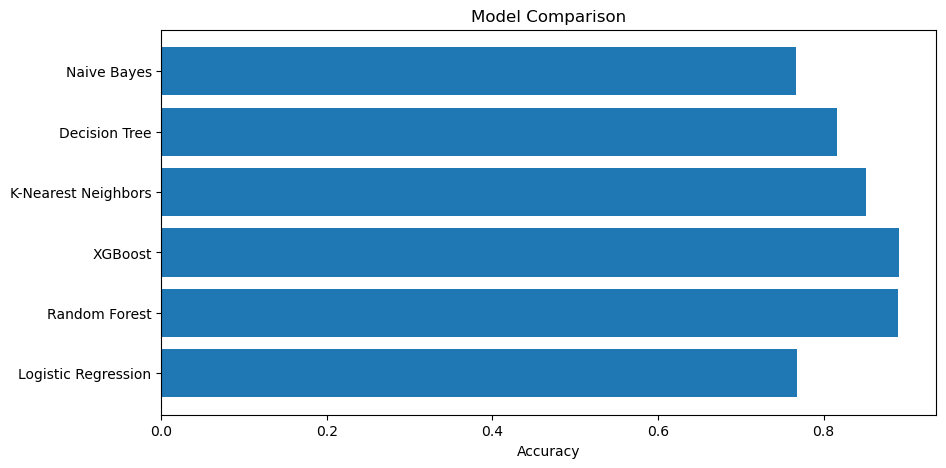


Best Model: XGBoost (Accuracy: 0.8916)


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

data_path = "infosys spring board internship/kaggle/input/dataset-loan_default/Loan_Default_Cleaned.csv"
df = pd.read_csv(data_path)

df = df.drop_duplicates()
leaky_cols = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges']
df = df.drop(columns=leaky_cols)

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

X = df.drop('Status', axis=1)
y = df['Status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,5))
plt.barh(list(results.keys()), list(results.values()))
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.show()

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
joblib.dump(best_model, f"{best_model_name.replace(' ', '_')}.pkl")
print(f"\nBest Model: {best_model_name} (Accuracy: {results[best_model_name]:.4f})")


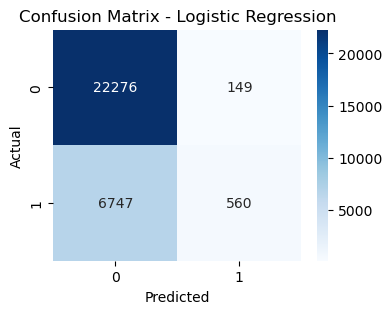

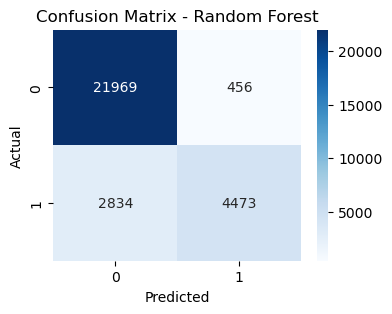

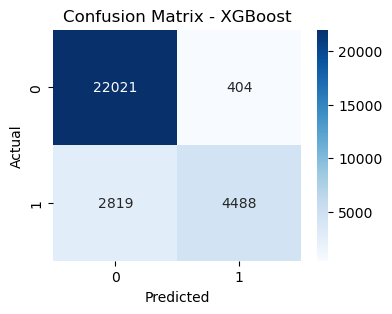

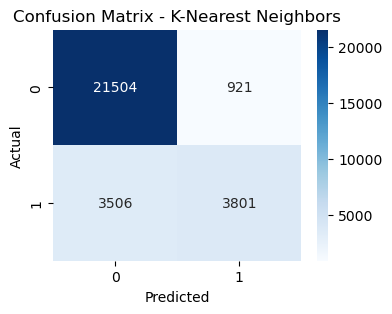

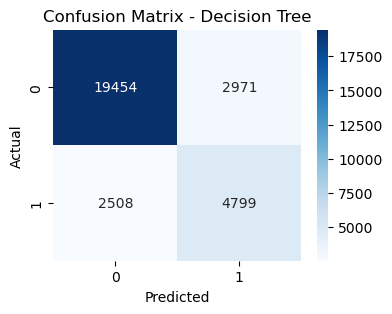

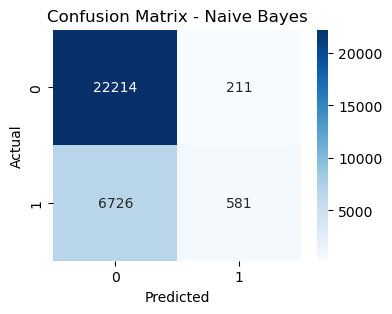

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


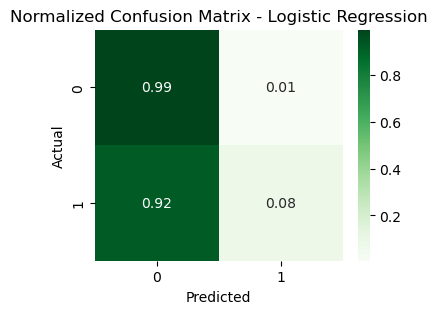

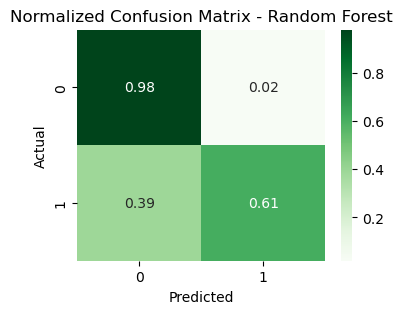

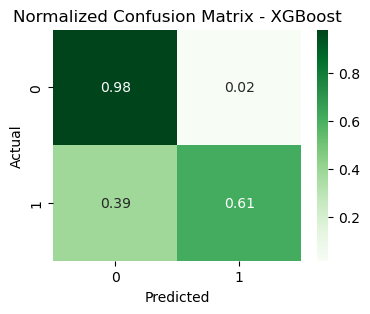

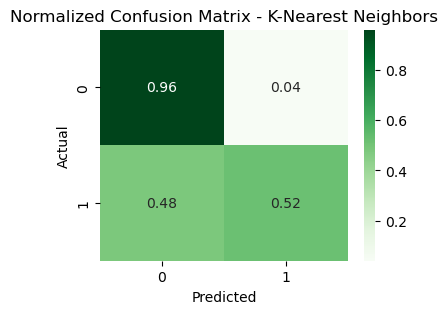

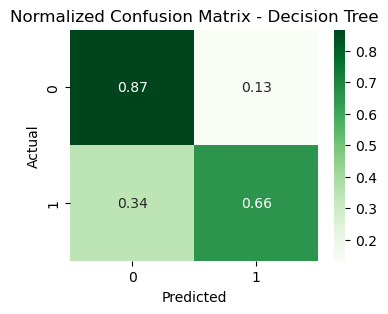

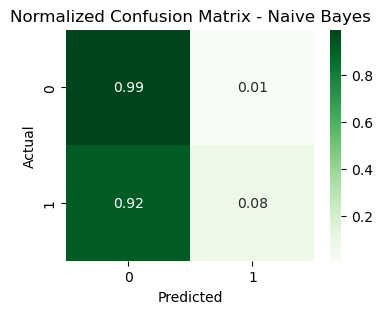

In [41]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, normalize='true')

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Greens')
    plt.title(f'Normalized Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [44]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Train metrics
    acc_train = accuracy_score(y_train, y_train_pred)
    se_train = recall_score(y_train, y_train_pred)
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
    sp_train = tn / (tn + fp)
    auc_train = roc_auc_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    
    # Test metrics
    acc_test = accuracy_score(y_test, y_test_pred)
    se_test = recall_score(y_test, y_test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    sp_test = tn / (tn + fp)
    auc_test = roc_auc_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    
    return [acc_train, se_train, sp_train, auc_train, f1_train,
            acc_test, se_test, sp_test, auc_test, f1_test]

columns = ['Train_Acc', 'Train_Se', 'Train_Sp', 'Train_AUC', 'Train_F1',
           'Test_Acc', 'Test_Se', 'Test_Sp', 'Test_AUC', 'Test_F1']

results_table = pd.DataFrame(columns=['Model'] + columns)

for name, model in models.items():
    row = evaluate_model(model, X_train, y_train, X_test, y_test)
    results_table.loc[len(results_table)] = [name] + row

pd.set_option('display.float_format', lambda x: f'{x:.4f}')
print(results_table)
# Save results_table to CSV
results_table.to_csv("model_results.csv", index=False)

print("\nCSV saved successfully as model_results.csv")


                 Model  Train_Acc  Train_Se  Train_Sp  Train_AUC  Train_F1  \
0  Logistic Regression     0.7661    0.0726    0.9930     0.5328    0.1328   
1        Random Forest     0.9999    0.9996    1.0000     0.9998    0.9998   
2              XGBoost     0.9046    0.6438    0.9900     0.8169    0.7690   
3  K-Nearest Neighbors     0.8823    0.5953    0.9762     0.7858    0.7138   
4        Decision Tree     0.9999    0.9997    1.0000     0.9998    0.9998   
5          Naive Bayes     0.7653    0.0765    0.9907     0.5336    0.1385   

   Test_Acc  Test_Se  Test_Sp  Test_AUC  Test_F1  
0    0.7681   0.0766   0.9934    0.5350   0.1397  
1    0.8893   0.6122   0.9797    0.7959   0.7311  
2    0.8916   0.6142   0.9820    0.7981   0.7358  
3    0.8511   0.5202   0.9589    0.7396   0.6320  
4    0.8157   0.6568   0.8675    0.7621   0.6366  
5    0.7667   0.0795   0.9906    0.5351   0.1435  

CSV saved successfully as model_results.csv
